# Imports

In [7]:
#Enable matplotlib to display in jupyter notebook & import it
%matplotlib inline

import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import re
from geopy.geocoders import Nominatim #used in filling missing zipcodes


# Reading Files

In [8]:
#Read Files
#"originals" should never be modified.  They exist to check work.  They should be deleted in our final work
listings_original = pd.read_csv('data/listings.csv')
calendar_oiginal = pd.read_csv('data/calendar.csv')
reviews_original = pd.read_csv('data/reviews.csv')

listings = listings_original.copy()
calendar = calendar_oiginal.copy()
reviews = reviews_original.copy()

# #Final version should just have the code below
# listings = pd.read_csv('data/listings.csv')
# calendar = pd.read_csv('data/calendar.csv')
# reviews = pd.read_csv('data/reviews.csv')


In [9]:
listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
5,12386020,https://www.airbnb.com/rooms/12386020,20160906204935,2016-09-07,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,none,We love our corner of Roslindale! For quiet wa...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,1.70
6,5706985,https://www.airbnb.com/rooms/5706985,20160906204935,2016-09-07,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,none,Roslindale is the new hip area of Boston. Clos...,...,9.0,f,NaN,NaN,f,strict,f,f,3,4.00
7,2843445,https://www.airbnb.com/rooms/2843445,20160906204935,2016-09-07,"""Tranquility"" on ""Top of the Hill""","We can accommodate guests who are gluten-free,...",We provide a bedroom and full shared bath. Ra...,"We can accommodate guests who are gluten-free,...",none,Our neighborhood is residential with friendly ...,...,10.0,f,NaN,NaN,f,moderate,t,t,2,2.38
8,753446,https://www.airbnb.com/rooms/753446,20160906204935,2016-09-07,6 miles away from downtown Boston!,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,none,Roslindale is a primarily residential neighbor...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,5.36
9,849408,https://www.airbnb.com/rooms/849408,20160906204935,2016-09-07,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,Perfect apartment rental for those in town vis...,This is a cozy and spacious two bedroom unit w...,none,"This neighborhood truly has it all. Good, not...",...,9.0,f,NaN,NaN,f,strict,f,f,2,1.01


# Clean the Data

## Listings Data

In [4]:
print('start')
#for testing
listings = listings_original.copy()

###remove hosts who have never responded to or received a message
listings = listings[listings.host_response_time.notnull()]

#listings.columns[(listings.isnull().sum()==3585)]
#returns these (empty variables)
#Index(['neighbourhood_group_cleansed', 'has_availability', 'license','jurisdiction_names'],
      
      
# Description:  
# Original shape = (3585, 95)

# id
# Type: Float
# What: The listing id is a unique id # for each property being listed on airBnB
# Cleaning: change to string, there is no reason to treat these as numbers, SET AS INDEX
listings.id = listings.id.astype(str)
#listings.index = set_index('id', inplace=True) #this also sets index but doesn't leave me with id as a column
listings.index = listings.id.copy()

# listing_url
# Type: String
# What: Url in for the listing in the format: "https://www.airbnb.com/rooms/" + listing.id
# Cleaning: leave in for easy access to listings while exploring data

# scrape_id
# Type: int
# What: Identify which webscrape the data came from, all of Boston came from the same scrape: 20160906204935
#Cleaning: Delete.  Not relevant to our analysis
del(listings['scrape_id'])

# last_scraped
# Type: str
# What: The date that our data was scraped, it is the same for all of Boston entries: 2016-09-07
# Cleaning : Convert to date
listings.last_scraped = pd.to_datetime(listings.last_scraped)

# name
# Type: str
# What: This text is the "title" of any listing.  In a search result it would 
#       be the text that users see as the first description of a listing.  It
#       is also the title of the page for a listing in browser history. etc.
# Cleaning:  None
# Uses: keyword analysis
pass

# summary
# Type: str or NaN
# What: Prose that is displayed on listing webpage for "About this listing".
# Cleaning: Fill NaN with "" so that all types match
# Uses: Keyword analysis
pass
len(listings.summary.unique()) #=3114
listings.summary = listings.summary.fillna('')
listings.summary[listings.summary == ''].count() #=143
listings.summary.value_counts().index[1] #most common summary other than ""
listings[listings.summary == listings.summary.value_counts().index[1]]
#more exploration of duplicates needed


# space
# Type: str or NaN
# What: [OPTIONAL] Prose to describe the inside space of a listing
# Cleaning: Fill NaN with "" so that all types match
listings.space.isnull().any()
len(listings.space.unique()) #=2269
listings.space = listings.space.fillna('')
listings.space[listings.space == ''].count() #=1057
listings.space.value_counts()
#more exploration of duplicates needed

# description
# Type: str
# What: Prose that contains the first 1000 characters of the merging of other descriptive prose:
#     summary
#     space
#     experiences_offered
#     neighborhood_overview
#     notes
#     transit
#     access
#     interaction
#     house_rules
# Cleaning: Delete.  the fact that it only gives us the first 1000 characters makes it unuseful.
del(listings['description'])

# experiences_offered
# Type: str
# What: 'none' for every entry
# Cleaning: Delete
del(listings['experiences_offered'])

# neighborhood_overview
# Type: str or NaN
# What: [OPTIONAL] description by host of the neighborhood 
# Cleaning: Fill NaN with "" so that all types match
listings.neighborhood_overview.isnull().sum() #=1415
len(listings.neighborhood_overview.unique()) #=1729
listings.neighborhood_overview = listings.neighborhood_overview.fillna('')
#more exploration of duplicates needed

# notes
# Type: str or NaN
# What: [OPTIONAL] under "Other things to note" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.notes.isnull().sum() #=1975
listings.notes = listings.notes.fillna('')
len(listings.notes.unique()) #=1270
#more exploration of duplicates needed


# transit
# Type: str or NaN
# What: [OPTIONAL] under "Getting around" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.transit.isnull().sum()
listings.transit = listings.transit.fillna('')
len(listings.transit.unique())
#more exploration of duplicates needed


# access
# Type: str or NaN
# What: [OPTIONAL] under "Guest access" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.access.isnull().sum() #=1489
listings.access = listings.access.fillna('') 
len(listings.access.unique()) #=1763
#more exploration of duplicates needed


# interaction
# Type: str or NaN
# What: [OPTIONAL] under "Interaction with guests" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.interaction.isnull().sum() #=1554
listings.interaction = listings.interaction.fillna('') 
len(listings.interaction.unique()) #=1618
#more exploration of duplicates needed


# house_rules
# Type: str or NaN
# What: [OPTIONAL] under "Interaction with guests" in the description on webpage
# Cleaning: Fill NaN with "" so that all types match
listings.house_rules.isnull().sum() #=1192
listings.house_rules = listings.house_rules.fillna('') 
len(listings.house_rules.unique()) #=1929



# thumbnail_url
# medium_url
# picture_url
# xl_picture_url
# Type: str or NaN
# What: URL to different image resourses
# Cleaning: Delete
del(listings['thumbnail_url'])
del(listings['medium_url'])
del(listings['picture_url'])
del(listings['xl_picture_url'])

# host_id
# Type: int
# What: The listing id is a unique id # for each host on airbnb
# Cleaning: change to string, there is no reason to treat these as numbers
listings.host_id = listings.host_id.astype(str)

# host_url
# Cleaning: Delete
del(listings['host_url'])


# host_name
# Type: str
# What: Host first name only
# Cleaning: append the user id to each host_Name to distinguish between people with the same name
listings['host_name'] = listings['host_name'] + ' ' + listings['host_id']
#listings.host_name.value_counts()

# host_since
# Type: str
# What:
# Cleaning: convert to date
listings.host_since = pd.to_datetime(listings.host_since)

# host_location
# Type: str
# What: Location that the host lives in
# Cleaning: delete (data is not consistent enough to be relevant, perhaps could be cleaned in the future)
del listings['host_location']


# host_about
# Type: Str or Nan
# What: Prose.  Host description of themselves.
# Cleaning: replace NaN with '' so all types match (str)
listings.host_about.isnull().sum() #1309
listings.host_about = listings.host_about.fillna('') 
len(listings.host_about.unique()) #=1241

# host_response_time
# Type: Str or NaN  [nan, 'within an hour', 'within a few hours', 'within a day', 'a few days or more']
# What: A value, (probably generated automatically by AirBnB) to indicate how long a message is replied to.
listings.host_response_time.isnull().sum() #471
listings.host_response_time = listings.host_response_time.fillna('') 

# host_response_rate
# Type: Str (in the form '<0-100>%' or NaN
# What: the percent of messages that a host responds to
# cleaning: leave NaN, convert rest to decimal value (0.0-1.0)
listings.host_response_rate.isnull().sum() #471
(listings.host_response_rate == '0%').sum() #13
listings.host_response_rate = listings.host_response_rate.apply(lambda x: np.NaN if type(x) == float else int(x[:-1])/100)

# host_acceptance_rate
# Type: Str (in the form '<0-100>%' or NaN
# What: the percent of offers to rent a room that a host accepts
# cleaning: leave NaN, convert rest to decimal value (0.0-1.0)
listings.host_acceptance_rate.isnull().sum() #471
(listings.host_acceptance_rate == '0%').sum() #49
listings.host_acceptance_rate = listings.host_acceptance_rate.apply(lambda x: np.NaN if type(x) == float else int(x[:-1])/100)
#plt = listings.host_acceptance_rate.hist(bins = 20)
#plt.set_title('host_acceptance_rate')

# host_is_superhost
# Type: Str 't' or 'f'
# What: special designation AirBnB provides to host who meet qulifications.
#       more info at https://www.airbnb.com/superhost/terms
# cleaning: convert to boolean True or False
listings.host_is_superhost = listings.host_is_superhost.apply(lambda x: True if x == 't'else False)
listings.host_is_superhost.sum() #407 superhosts

# host_thumbnail_url
# Cleaning: Delete
del(listings['host_thumbnail_url'])

# host_picture_url
# Cleaning: Delete
del(listings['host_picture_url'])

# host_neighbourhood
# Type: Str or Nan
# What: Self reported neighborhood the host lives in.  not reliablie or useful
# Cleaning: delete
del listings['host_neighbourhood']

# host_listings_count
# Type: int
# What: The number of listings that the host has ACROSS ALL OF AIRBNB
# Related: If you want the number of listings that they have in this set, use calculated_host_listings_count

# host_total_listings_count
# Cleaning: Delete
(listings['host_total_listings_count'] == listings['host_listings_count']).all() #true
del(listings['host_total_listings_count'])

# host_verifications
###Unique Values:
##set([item for host in [re.sub(r"[\['\s\]]", '', host, 0).split(',') for host in listings.host_verifications.unique().tolist()] for item in host])
## {'amex',
##  'email',
##  'facebook',  
##  'google',
##  'jumio',
##  'kba',
##  'linkedin',
##  'manual_offline',
##  'manual_online',
##  'phone',
##  'reviews',
##  'sent_id',
##  'weibo'}
# cleaning: Delete
#del listings['host_verifications']

# host_has_profile_pic
# Cleaning: Delete, only 7 don't have a pic, also not relevant to our work
listings.host_has_profile_pic[listings.host_has_profile_pic == 'f'] #there were 7 listings
del(listings['host_has_profile_pic'])

# host_identity_verified
# Type: str ('t' or 'f')
# What: is the hosts identity verified
# Cleaning:
#listings.host_identity_verified.value_counts()  
        #t    2359
        #f     755
listings.host_identity_verified = listings.host_identity_verified == 't'
listings[listings.host_identity_verified == False].host_verifications
#this shows that there are some ways to partially verify a host identity without gaining "host_identity_verrified" status

# street
# Type: str (e.g. Pinehurst Street, Boston, MA 02131, United States) (not all are consistent format)
# What: street that the listing is on.
# Cleaning: delete
#listings.street.str.extract(r'^(.*?)[\s,]').value_counts()
del listings['street']


# neighbourhood
# Type: str 
# What: neighborhood the listing is in
# Cleaning: delete. neighbourhood_cleansed contains better data that matches neighbourhood.geojson (I think)
del listings['neighbourhood']
#n = listings[['neighbourhood','neighbourhood_cleansed']]
#n = n[(n['neighbourhood'] != n['neighbourhood_cleansed'])]
#n[(n['neighbourhood'] == n['neighbourhood'])]
#n.to_csv('neighbourhood_vs_neighbourhood_cleansed.csv')

# neighbourhood_cleansed
# Type: str 
# What: neighborhood the listing is in
# Cleaning: None needed

# neighbourhood_group_cleansed
# Cleaning: Delete, empty variable (all null)
del listings['neighbourhood_group_cleansed']


# city
# Type: str 
# What: City as reported by host.  Not SUPER consistent
# Cleaning: Delete, we have enough good location data from other variables.
del listings['city']

# state
# Type: str.  all values are 'MA'
# Cleaning: delete
del listings['state']

# zipcode
# Type: str or NaN
# What: Zipcode that the listing is in
# Cleaning: Fill in missing zipcodes usings the latitude and longitude.  Cut off anything past the 5th digit

# ###>>>this code has ben commented out because it is slow, uncomment it for fully cleaned data.
def latlonToZip(lat, lon):
    geolocator = Nominatim()
    try:
        location = geolocator.reverse(str(lat)+','+str(lon))
        z = re.compile('(\s)([0-9]{5})(,\sUnited)')
        #print(z.findall(location[0])[0][1])
        return z.findall(location[0])[0][1]
    except:
        print(str(lat)+','+str(lon),'-----',location)
        return np.nan
    
    print(str(lat)+','+str(lon),'-----',location)
    return np.nan
temp = listings[listings.zipcode.isnull()].copy()
listings.zipcode.update(temp.apply(lambda x: latlonToZip(x['latitude'], x['longitude']), axis=1))
listings.zipcode = listings.zipcode.apply(lambda x: x[:5])

# market
# Cleaning: Delete
# listings.market[listings.market != 'Boston'] ######the results from this are very odd
del listings['market']


# smart_location
# Cleaning: Delete, not great data, redunant with 'city' and we have better data for location 
del listings['smart_location']

# country_code
# Cleaning: Delete
(listings.country_code == listings.country_code[0]).all() #=True: 'US'
del listings['country_code']

# country
(listings.country == listings.country[0]).all() #=True: 'United States'
del listings['country']

# latitude
listings.latitude


# longitude
######################################################################################################CollinToDO

# is_location_exact
######################################################################################################CollinToDO

# property_type
######################################################################################################CollinToDO

# room_type
######################################################################################################CollinToDO

# accommodates
######################################################################################################CollinToDO

# bathrooms
######################################################################################################CollinToDO

# bedrooms
######################################################################################################CollinToDO

# beds
######################################################################################################CollinToDO

# bed_type
######################################################################################################CollinToDO

# amenities
######################################################################################################CollinToDO


# square_feet
# Cleaning:  We may want to consider deleting this variable, only 56 entries have data
listings.square_feet.isnull().sum() #=3529
listings.square_feet = listings.square_feet.replace('[^0-9.]+','',regex=True).astype(float)

# price
#this regex "replaces" anything that is not a digit or a decimal with the empty string
#effectively removing anything that's not part of the number
listings.price = listings.price.replace('[^0-9.]+','',regex=True).astype(float)


# weekly_price
listings.weekly_price = listings.weekly_price.replace('[^0-9.]+','',regex=True).astype(float)
# monthly_price
listings.monthly_price = listings.monthly_price.replace('[^0-9.]+','',regex=True).astype(float)
# security_deposit
listings.security_deposit = listings.security_deposit.replace('[^0-9.]+','',regex=True).astype(float)
# cleaning_fee
listings.cleaning_fee = listings.cleaning_fee.replace('[^0-9.]+','',regex=True).astype(float)

# guests_included
######################################################################################################CollinToDO

# extra_people
######################################################################################################CollinToDO

# minimum_nights
######################################################################################################CollinToDO

# maximum_nights
######################################################################################################CollinToDO

# calendar_updated
######################################################################################################CollinToDO


# has_availability
# Cleaning: Delete, empty variable (all null)
del listings['has_availability']



# availability_30
######################################################################################################CollinToDO

# availability_60
######################################################################################################CollinToDO

# availability_90
######################################################################################################CollinToDO

# availability_365
######################################################################################################CollinToDO

# calendar_last_scraped
######################################################################################################CollinToDO

# number_of_reviews
######################################################################################################CollinToDO

# first_review
######################################################################################################CollinToDO

# last_review
######################################################################################################CollinToDO

# review_scores_rating
######################################################################################################CollinToDO

# review_scores_accuracy
######################################################################################################CollinToDO

# review_scores_cleanliness
######################################################################################################CollinToDO

# review_scores_checkin
######################################################################################################CollinToDO

# review_scores_communication
######################################################################################################CollinToDO

# review_scores_location
######################################################################################################CollinToDO

# review_scores_value
######################################################################################################CollinToDO

# requires_license
######################################################################################################CollinToDO

# license
# Cleaning: Delete, empty variable (all null)
del listings['license']

# jurisdiction_names
# Cleaning: Delete, empty variable (all null)
del listings['jurisdiction_names']

# instant_bookable
######################################################################################################CollinToDO

# cancellation_policy
######################################################################################################CollinToDO

# require_guest_profile_picture
######################################################################################################CollinToDO

# require_guest_phone_verification
######################################################################################################CollinToDO



# calculated_host_listings_count
# Type: int
# What: The number of listings that the host has THIS data set
# Related: If you want the number of th listings that the host has across ALL of airbnb
#          use host_listings_count
#listings.calculated_host_listings_count == listings.host_listings_count # not all true
#listings[['host_id','calculated_host_listings_count','host_listings_count']][listings.calculated_host_listings_count != listings.host_listings_count]



# reviews_per_month
######################################################################################################CollinToDO



#TO Do:
#delete all listings whose  host_response_time is null


listings_cleaned = listings.copy()
print('done')


start
done


In [5]:
calendar_oiginal = pd.read_csv('data/calendar.csv')
calendar = calendar_oiginal.copy()


#this code removes any listings that have no price data. We might want to uncomment it.
#remove = calendar.groupby('listing_id').filter(lambda x: x.price.isnull().all())
#cleaned_calendar = calendar.drop(remove.index)
#calendar = cleaned_calendar.copy()

#
calendar.date = pd.to_datetime(calendar.date)
calendar['day_of_week'] = calendar.date.dt.dayofweek

#
calendar.available.replace({'f':False,'t':True}, inplace=True)

#
calendar.price = calendar.price.replace('[^0-9.]+','',regex=True).astype(float)

day_means = calendar.groupby(['listing_id','day_of_week']).price.mean()
day_means = pd.DataFrame(day_means)
day_means.price = day_means.price.fillna(0)
day_means = day_means.to_dict('index')

calendar['price_model'] = list(zip(calendar.listing_id, calendar.day_of_week))
calendar.price_model = calendar.price_model.apply(lambda x: day_means[x]['price'])
calendar['modeled_price'] = np.where(calendar.price.isnull(),calendar.price_model,calendar.price)

calendar_cleaned = calendar.copy()

In [7]:
com_host_id = listings[listings.calculated_host_listings_count >2].host_id.unique()

In [8]:
com_list_id = listings.id[listings.host_id.isin(com_host_id)]


In [24]:
com_calendar = calendar[calendar.listing_id.isin(com_list_id)]
com_calendar.head()

,listing_id,date,available,price,day_of_week,price_model,modeled_price
2190,5706985,2017-09-05,True,100.0,1,106.882353,100.0
2191,5706985,2017-09-04,True,100.0,0,106.734694,100.0
2192,5706985,2017-09-03,True,100.0,6,104.940000,100.0
2193,5706985,2017-09-02,True,125.0,5,126.562500,125.0
2194,5706985,2017-09-01,True,125.0,4,126.562500,125.0


In [16]:
com_calendar['avail_int'] = com_calendar.available.apply(int)
mean_avail = com_calendar.groupby('date').avail_int.mean()

/Users/collinreinking/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



/Users/collinreinking/anaconda3/lib/python3.5/site-packages/calmap/__init__.py:294: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()



(<matplotlib.figure.Figure at 0x106c51a58>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x117aa36a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1295a2358>], dtype=object))

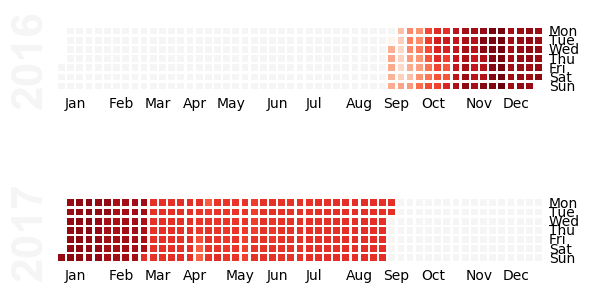

In [21]:
%matplotlib inline
import calmap
calmap.calendarplot(mean_avail)

/Users/collinreinking/anaconda3/lib/python3.5/site-packages/calmap/__init__.py:294: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()



(<matplotlib.figure.Figure at 0x1296375c0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x129626c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x136584748>], dtype=object))

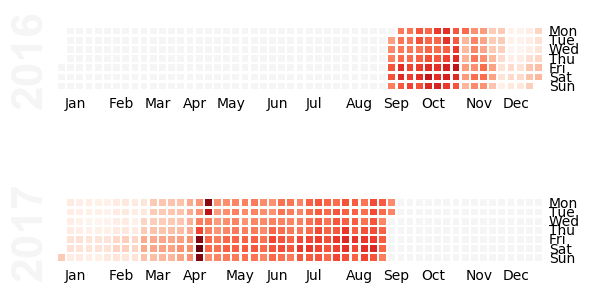

In [36]:
mean_filled_price = com_calendar.groupby('date').modeled_price.mean()
calmap.calendarplot(mean_filled_price)

/Users/collinreinking/anaconda3/lib/python3.5/site-packages/calmap/__init__.py:294: FutureWarning:

how in .resample() is deprecated
the new syntax is .resample(...).sum()



(<matplotlib.figure.Figure at 0x136715a58>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x13660ac50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x136749a20>], dtype=object))

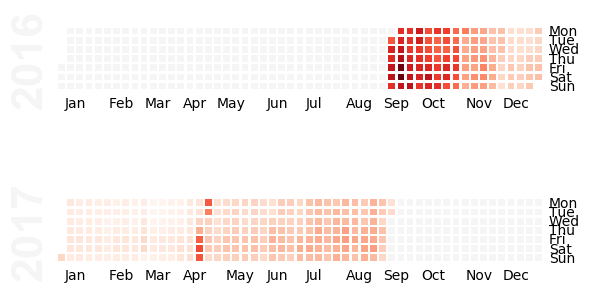

In [37]:
mean_price_available = com_calendar.groupby('date').price.mean()
calmap.calendarplot(mean_price_available)